[[ 1.  0.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  0.  1.]]


,Node Position (m),Temperature (Deg C)
Node Number,,
0,0.00,0.0
1,0.02,2.0
2,0.04,4.0
3,0.06,6.0
4,0.08,8.0
5,0.10,10.0
6,0.12,12.0
7,0.14,14.0
8,0.16,16.0


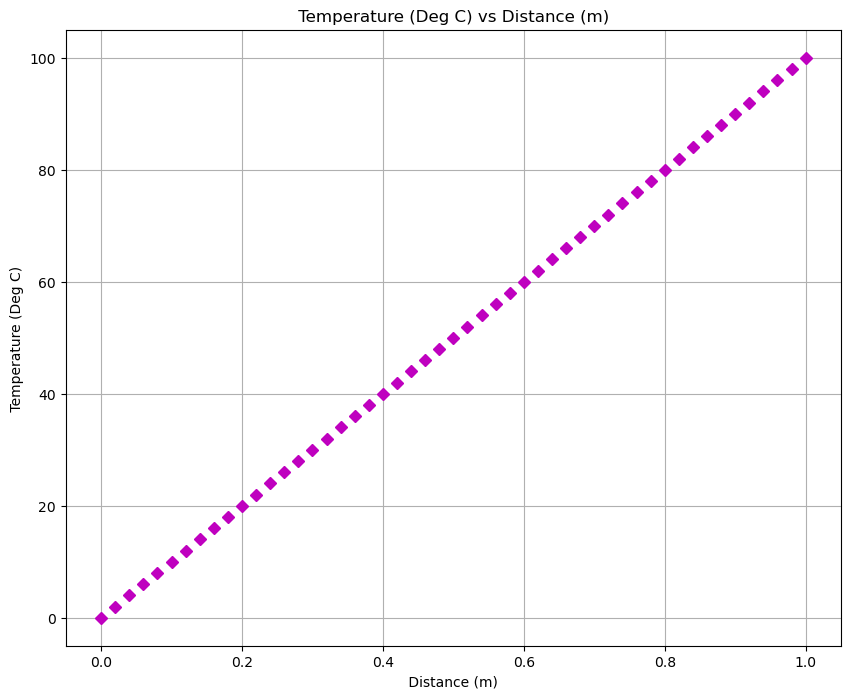

In [3]:
import numpy as np
import math 
import matplotlib.pyplot as plt 
import pandas as pd

L = 1 #m 
n = 49
n1 = n+1 
n2 = n+2
sigfigs = 4 
A = np.zeros((n2,n2)) #Build an empty matrix of the correct size
A[0,0] = 1 #set value of first entry 
A[n+1,n+1] = 1 #set value of last entry 
for i in range(1,n1): #fill the rest of the matrix
    A[i,i-1] = 1
    A[i,i] = -2
    A[i,i+1] = 1
    
b = np.zeros(n2) #build solution matrix 
b[0] = 0 
b[-1] = 100
print(A)
y = np.linalg.solve(A,b) #solve matrix equation 
x = np.linspace(0,L,n+2) #build length array 


fig = plt.figure(figsize=(10,8))
plt.plot(x,y,'mD')
plt.title(" Temperature (Deg C) vs Distance (m) ") #create title 
plt.xlabel(' Distance (m) ') #label x axis 
plt.ylabel(' Temperature (Deg C) ') #label y axis
plt.grid(True)
df = pd.DataFrame({' Node Position (m) ' : x, ' Temperature (Deg C) ': y} )
df.index.name= 'Node Number '
fig.savefig('Heat Transfer.jpeg', dpi=300, bbox_inches='tight') #save figure to jpeg 
with open('Heat Transfer.csv','w',) as f: #write datarame tables to csv file
    df.to_csv(f)
    f.write("\n")

df


,Node Position (m),Temperature (Deg C)
Node Number,,
0,0.00,0.000000
1,0.02,1.999998
2,0.04,3.999997
3,0.06,5.999995
4,0.08,7.999993
5,0.10,9.999992
6,0.12,11.999990
7,0.14,13.999989
8,0.16,15.999987


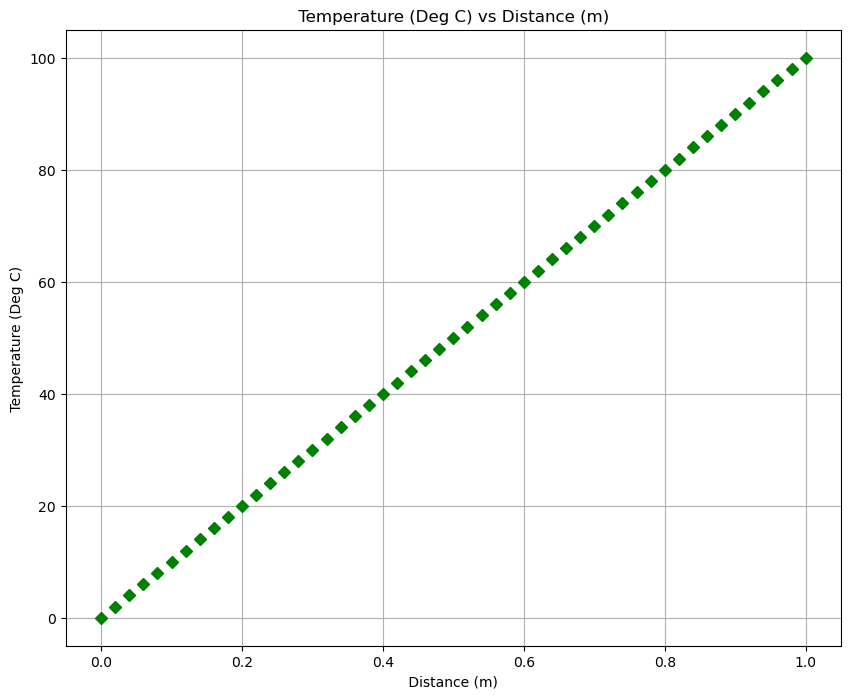

In [7]:
import numpy as np
import math 
import matplotlib.pyplot as plt 
import pandas as pd

L = 1 #m 
n = 49
n1 = n+1 
n2 = n+2
sigfigs = 4 
epi = 0.0000001
max_err = 10
y = np.zeros(n2) #Build array of zeros of node number and end points 
u = np.zeros(n2) #Build array of zeros of node number and end points 

b = np.zeros(n2)
b[0] = 0 
b[-1] = 100
u[0] = 0 
u[-1] = 100
L_err = []
while max_err > epi:   

    for j in range(1,n1):
        y[j] = -(1/2)*(b[j] - (u[j+1]+u[j-1]))
        err = np.abs(y[j]-u[j])
        L_err.append(err)
        u[j] = y[j]

    max_err = max(L_err)
    L_err = []
    x = np.linspace(0,L,n2)



fig = plt.figure(figsize=(10,8))
plt.plot(x,u,'gD')
plt.title(" Temperature (Deg C) vs Distance (m) ") #create title 
plt.xlabel(' Distance (m) ') #label x axis 
plt.ylabel(' Temperature (Deg C) ') #label y axis
plt.grid(True)
df = pd.DataFrame({' Node Position (m) ' : x, ' Temperature (Deg C) ': u} )
df.index.name= 'Node Number '
fig.savefig('Heat Transfer2.jpeg', dpi=300, bbox_inches='tight') #save figure to jpeg 
with open('Heat Transfer2.csv','w',) as f: #write datarame tables to csv file
    df.to_csv(f)
    f.write("\n")

df


SyntaxError: invalid syntax (3650467304.py, line 26)